# Libraries

In [1]:
import requests
import pandas as pd
import json
from typing import Optional, Dict, Any, List
from missingno import matrix

## No column display limit

In [2]:
pd.set_option('display.max_columns', None)

# Data extraction

## API setup

In [3]:
class LongBeachAnimalShelterAPI:
    """
    A Python client for extracting data from the Long Beach Animal Shelter API
    using the Opendatasoft Explore API v2.1
    """
    
    def __init__(self):
        self.base_url = "https://longbeach.opendatasoft.com/api/explore/v2.1"
        self.dataset_id = "animal-shelter-intakes-and-outcomes"
        
    def get_all_records(self, 
                       select: Optional[str] = None,
                       where: Optional[str] = None,
                       order_by: Optional[str] = None) -> pd.DataFrame:
        """
        Extract all records from the animal shelter dataset without limits.
        
        Args:
            select: Fields to select (default: all fields)
            where: Filter conditions using ODSQL syntax
            order_by: Order by clause
            
        Returns:
            pandas.DataFrame with all records
        """
        
        all_records = []
        offset = 0
        limit = 100  # Maximum allowed per request
        
        while True:
            # Build API request
            url = f"{self.base_url}/catalog/datasets/{self.dataset_id}/records"
            
            params = {
                'limit': limit,
                'offset': offset
            }
            
            # Add optional parameters
            if select:
                params['select'] = select
            if where:
                params['where'] = where
            if order_by:
                params['order_by'] = order_by
                
            try:
                response = requests.get(url, params=params)
                response.raise_for_status()
                
                data = response.json()
                
                # Extract records from response
                records = data.get('results', [])
                
                if not records:
                    break
                    
                all_records.extend(records)
                
                # Check if we've retrieved all records
                total_count = data.get('total_count', 0)
                if len(all_records) >= total_count:
                    break
                    
                # Move to next batch
                offset += limit
                
                print(f"Retrieved {len(all_records)} of {total_count} records...")
                
            except requests.RequestException as e:
                print(f"Error fetching data: {e}")
                break
                
        # Convert to DataFrame
        df = pd.DataFrame(all_records)
        print(f"Successfully retrieved {len(df)} total records")
        
        return df
    
    def get_dataset_info(self) -> Dict[str, Any]:
        """
        Get metadata about the dataset including field information.
        
        Returns:
            Dictionary with dataset metadata
        """
        url = f"{self.base_url}/catalog/datasets/{self.dataset_id}"
        
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response.json()
            
        except requests.RequestException as e:
            print(f"Error fetching dataset info: {e}")
            return {}
    
    def export_to_csv(self, 
                     filename: str = "animal_shelter_data.csv",
                     select: Optional[str] = None,
                     where: Optional[str] = None) -> bool:
        """
        Export data directly to CSV using the API's export endpoint.
        
        Args:
            filename: Output CSV filename
            select: Fields to select
            where: Filter conditions
            
        Returns:
            True if successful, False otherwise
        """
        url = f"{self.base_url}/catalog/datasets/{self.dataset_id}/exports/csv"
        
        params = {'limit': -1}  # -1 means no limit for exports
        
        if select:
            params['select'] = select
        if where:
            params['where'] = where
            
        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            
            with open(filename, 'wb') as f:
                f.write(response.content)
                
            print(f"Data exported to {filename}")
            return True
            
        except requests.RequestException as e:
            print(f"Error exporting data: {e}")
            return False

## Run

In [4]:
if __name__ == "__main__":
    
    # Initialize the API client
    api = LongBeachAnimalShelterAPI()
    
    # Example 1: Get all records
    print("Fetching all animal shelter records...")
    df = api.get_all_records()
    print(f"Retrieved {len(df)} records")
    print(f"Columns: {list(df.columns)}")
    
    
    # Example 5: Export directly to CSV
    print("\nExporting all data to CSV...")
    api.export_to_csv("longbeach_animal_shelter_complete.csv")
    
    
    # Display sample data
    if not df.empty:
        print("\nSample data:")
        print(df.head())

Fetching all animal shelter records...
Retrieved 100 of 32367 records...
Retrieved 200 of 32367 records...
Retrieved 300 of 32367 records...
Retrieved 400 of 32367 records...
Retrieved 500 of 32367 records...
Retrieved 600 of 32367 records...
Retrieved 700 of 32367 records...
Retrieved 800 of 32367 records...
Retrieved 900 of 32367 records...
Retrieved 1000 of 32367 records...
Retrieved 1100 of 32367 records...
Retrieved 1200 of 32367 records...
Retrieved 1300 of 32367 records...
Retrieved 1400 of 32367 records...
Retrieved 1500 of 32367 records...
Retrieved 1600 of 32367 records...
Retrieved 1700 of 32367 records...
Retrieved 1800 of 32367 records...
Retrieved 1900 of 32367 records...
Retrieved 2000 of 32367 records...
Retrieved 2100 of 32367 records...
Retrieved 2200 of 32367 records...
Retrieved 2300 of 32367 records...
Retrieved 2400 of 32367 records...
Retrieved 2500 of 32367 records...
Retrieved 2600 of 32367 records...
Retrieved 2700 of 32367 records...
Retrieved 2800 of 32367 r

In [5]:
df = pd.read_csv("longbeach_animal_shelter_complete.csv", sep=None, engine='python')

## Data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32367 entries, 0 to 32366
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ﻿animal_id         32367 non-null  object 
 1   animal_name        19253 non-null  object 
 2   animal_type        32367 non-null  object 
 3   primary_color      32367 non-null  object 
 4   secondary_color    15289 non-null  object 
 5   sex                32367 non-null  object 
 6   dob                28246 non-null  object 
 7   intake_date        32367 non-null  object 
 8   intake_cond        32367 non-null  object 
 9   intake_type        32367 non-null  object 
 10  intake_subtype     31942 non-null  object 
 11  reason             2164 non-null   object 
 12  outcome_date       31972 non-null  object 
 13  crossing           32367 non-null  object 
 14  jurisdiction       32366 non-null  object 
 15  outcome_type       31965 non-null  object 
 16  outcome_subtype    284

## Data preview

In [7]:
df.head()

,﻿animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_cond,intake_type,intake_subtype,reason,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,geopoint
0,A742673,*CHERRY,CAT,BLACK,WHITE,Female,2025-04-28,2025-06-13,UNDER AGE/WEIGHT,STRAY,OTC,NaN,NaN,"6600 BLK LONG BEACH BLVD, LONG BEACH, CA 90805",LONG BEACH,NaN,NaN,33.874691,-118.20261,Alive on Intake,False,1,"33.8746909, -118.2026096"
1,A739315,NaN,CAT,GRAY,WHITE,Male,2025-04-01,2025-04-11,UNDER AGE/WEIGHT,STRAY,OTC,NaN,2025-04-12,"6600 BLK LONG BEACH BLVD, LONG BEACH, CA 90805",LONG BEACH,RESCUE,LITTLELION,33.874691,-118.20261,Alive on Intake,False,1,"33.8746909, -118.2026096"
2,A629181,NaN,DOG,BROWN,NaN,Male,2018-06-30,2019-06-30,INJURED SEVERE,STRAY,FIELD,NaN,2019-06-30,"6600 BLK LONG BEACH BLVD, LONG BEACH, CA 90805",LONG BEACH,EUTHANASIA,AT VET,33.874691,-118.20261,Alive on Intake,True,0,"33.8746909, -118.2026096"
3,A659886,NaN,DOG,WHITE,NaN,Male,2015-07-04,2021-07-04,INJURED MODERATE,STRAY,FIELD,NaN,2021-07-05,"6600 BLK LONG BEACH BLVD, LONG BEACH, CA 90805",LONG BEACH,EUTHANASIA,AT VET,33.874691,-118.20261,Alive on Intake,True,0,"33.8746909, -118.2026096"
4,A704407,*LYNETTE,DOG,TAN,NaN,Spayed,2019-02-06,2023-08-06,NORMAL,STRAY,OTC,NaN,2023-08-15,6600 BLK N CURTIS AVE LONG BEACH CA 90805,LONG BEACH,ADOPTION,NaN,33.874754,-118.15889,Alive on Intake,False,1,"33.874754, -118.1588895"


# Data cleaning & Processing 1

## Datetime conversion

In [8]:
# Convert *dob*, *intake_date*, *outcome_date* to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['intake_date'] = pd.to_datetime(df['intake_date'], errors='coerce')
df['outcome_date'] = pd.to_datetime(df['outcome_date'], errors='coerce')


## Adding time to outcome

In [9]:
df['time_to_outcome'] = df['outcome_date'] - df['intake_date'] # Calculate time to outcome in days

# EDA

## Null value analysis

In [10]:
# Percentage of null values in each column
df.isnull().mean()*100

animal_id            0.000000
animal_name          40.516576
animal_type           0.000000
primary_color         0.000000
secondary_color      52.763617
sex                   0.000000
dob                  12.732104
intake_date           0.000000
intake_cond           0.000000
intake_type           0.000000
intake_subtype        1.313066
reason               93.314178
outcome_date          1.220379
crossing              0.000000
jurisdiction          0.003090
outcome_type          1.242006
outcome_subtype      12.117280
latitude              0.000000
longitude             0.000000
intake_is_dead        0.000000
outcome_is_dead       0.000000
was_outcome_alive     0.000000
geopoint              0.000000
time_to_outcome       1.220379
dtype: float64

## MSNO matrix

<Axes: >

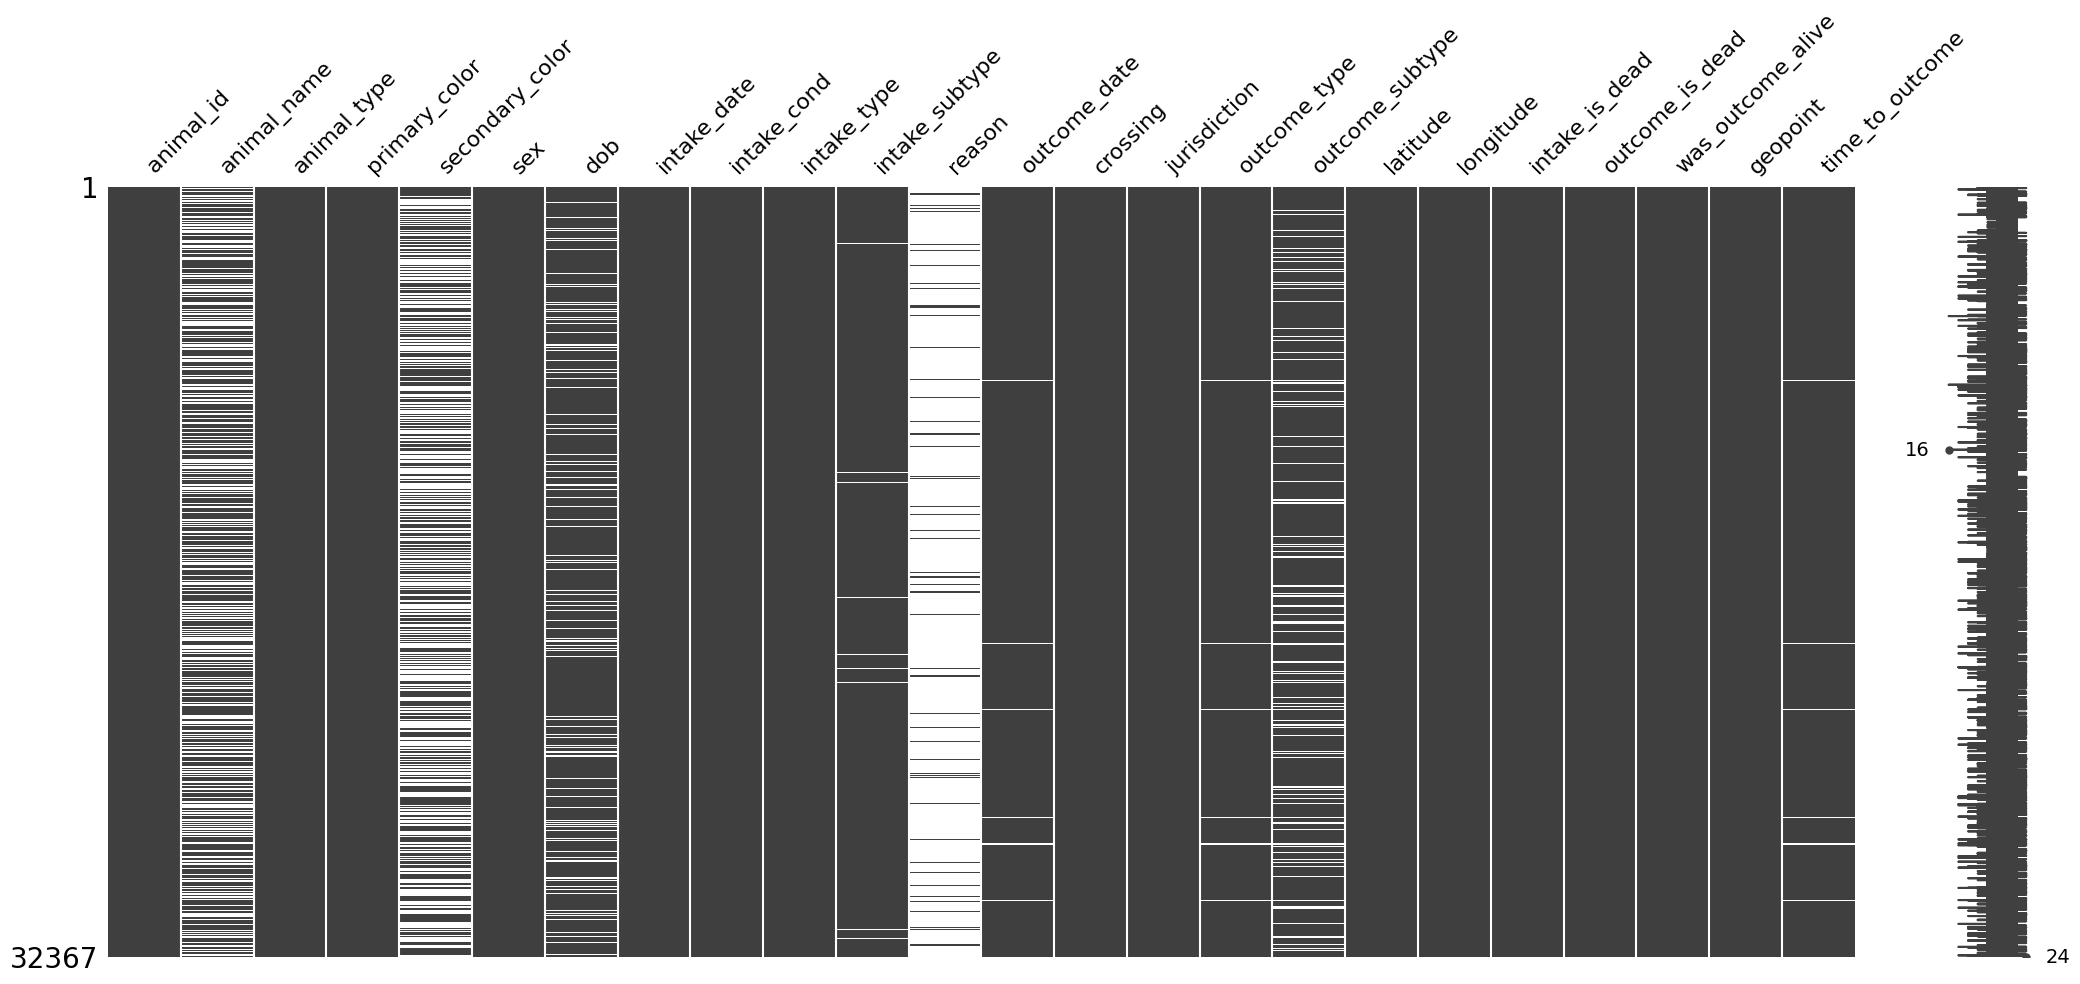

In [11]:
matrix(df)

# Data cleaning & Processing 2

## Replace null values of secondary colour

In [12]:
df['secondary_color'] = df['secondary_color'].fillna('None')

## Dropping columns *reason*, *geopoint*, *was_outcome_alive*, *animal_id*

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32367 entries, 0 to 32366
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   ﻿animal_id         32367 non-null  object         
 1   animal_name        19253 non-null  object         
 2   animal_type        32367 non-null  object         
 3   primary_color      32367 non-null  object         
 4   secondary_color    32367 non-null  object         
 5   sex                32367 non-null  object         
 6   dob                28246 non-null  datetime64[ns] 
 7   intake_date        32367 non-null  datetime64[ns] 
 8   intake_cond        32367 non-null  object         
 9   intake_type        32367 non-null  object         
 10  intake_subtype     31942 non-null  object         
 11  reason             2164 non-null   object         
 12  outcome_date       31972 non-null  datetime64[ns] 
 13  crossing           32367 non-null  object     

# Observations, changes, & notes

# Observations, changes, & notes

# Observations, changes, & notes

# Observations, changes, & notes

# Observations, changes, & notes

1. Drop the following columns: *reason*, *geopoint*, *was_outcome_alive*, *animal_id*
2. Add a *has_name* column, then drop *animal_name*
3. Replace null values in *secondary_color* to "None" so that data for animals with more colours is preserved
4. Drop missing values for *outcome_type*, *intake_subtype*, 
5. Replace missing values in *outcome_subtype* to most commonly occuring values, **after more exploration**
6. Once incorporated into LUCA, drop *latitude*, *longitude*. Use *jurisdiction*
7. Drop *crossing*, unless it helps in geospatial mapping
8. Add a *time_to_outcome* variable
9. Convert *dob*, *intake_date*, *outcome_date* to datetime
10. *outcome_date*, and *outcome_type* have values missing together. Some values in *outcome_subtype* also miss when *outcome_type* is missing.